In [1]:
import matplotlib.pyplot as plt

In [2]:
import netCDF4 as nc

In [3]:
from netCDF4 import Dataset

In [4]:
from matplotlib import pyplot as plt

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import xarray as xr

In [8]:
import cartopy.crs as ccrs

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [9]:
fn = '/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_baseline_ensemble1_ssp126_1m.nc'

In [10]:
ds = xr.open_dataset(fn)
ds

<xarray.Dataset>
Dimensions:               (y: 511, x: 722, time_counter: 1020, axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2015-01-16T12:00:00 ....
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    co2flux_cpl           (time_counter, y, x) float64 ...
Attributes:
    name:         FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20150101_20151231
    description:  diagnostics 2d bio
    title:        diagnostics 2d bio
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2022-Apr-04 13:54:06 CEST
    history:      Wed Jul 13 13:57:37 2022: ncrcat -F -O -L 1 -7 -v co2flux_c...
    NCO:          netCDF Operators version 4.9.1 (Homepage = http://nco.sf.ne...

In [15]:
for var in ds.variables.values(): #print all variables 
    print(var)
    
# in alternative -ds.variables.values()-

<xarray.Variable (y: 511, x: 722)>
array([[-77.010475, -77.010475, -77.010475, ..., -77.010475, -77.010475,
        -77.010475],
       [-76.89761 , -76.89761 , -76.89761 , ..., -76.89761 , -76.89761 ,
        -76.89761 ],
       [-76.78378 , -76.78378 , -76.78378 , ..., -76.78378 , -76.78378 ,
        -76.78378 ],
       ...,
       [ 49.988163,  49.988163,  50.064743, ...,  50.064743,  49.988163,
         49.988163],
       [ 49.995502,  49.995502,  50.065956, ...,  50.065956,  49.995502,
         49.995502],
       [ 49.995502,  49.995502,  50.065956, ...,  50.065956,  49.995502,
         49.995502]], dtype=float32)
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
<xarray.Variable (y: 511, x: 722)>
array([[72.75    , 73.25    , 73.75    , ..., 72.25    , 72.75    , 73.25    ],
       [72.75    , 73.25    , 73.75    , ..., 72.25    , 72.75    , 73.25    ],
       [72.75    , 73.25    , 73.75    , ..., 72.25    , 72.75    , 73.25 

In [12]:
print(ds.variables.keys())

KeysView(Frozen({'nav_lat': <xarray.Variable (y: 511, x: 722)>
[368942 values with dtype=float32]
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north, 'nav_lon': <xarray.Variable (y: 511, x: 722)>
[368942 values with dtype=float32]
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east, 'time_centered': <xarray.Variable (time_counter: 1020)>
array(['2015-01-16T12:00:00.000000000', '2015-02-15T00:00:00.000000000',
       '2015-03-16T12:00:00.000000000', ..., '2099-10-16T12:00:00.000000000',
       '2099-11-16T00:00:00.000000000', '2099-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name:      Time axis
    time_origin:    2015-01-01 00:00:00
    bounds:         time_centered_bounds, 'time_centered_bounds': <xarray.Variable (time_counter: 1020, axis_nbounds: 2)>
array([['2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.00000000

In [13]:
ds.nav_lat

<xarray.DataArray 'nav_lat' (y: 511, x: 722)>
[368942 values with dtype=float32]
Coordinates:
    nav_lat  (y, x) float32 ...
    nav_lon  (y, x) float32 ...
Dimensions without coordinates: y, x
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north

In [14]:
ds.variables['time_counter'] #print variable
ds_time = ds.variables['time_counter']
ds_time[0:25] #time stored as an object

<xarray.IndexVariable 'time_counter' (time_counter: 25)>
array(['2015-01-16T12:00:00.000000000', '2015-02-15T00:00:00.000000000',
       '2015-03-16T12:00:00.000000000', '2015-04-16T00:00:00.000000000',
       '2015-05-16T12:00:00.000000000', '2015-06-16T00:00:00.000000000',
       '2015-07-16T12:00:00.000000000', '2015-08-16T12:00:00.000000000',
       '2015-09-16T00:00:00.000000000', '2015-10-16T12:00:00.000000000',
       '2015-11-16T00:00:00.000000000', '2015-12-16T12:00:00.000000000',
       '2016-01-16T12:00:00.000000000', '2016-02-15T12:00:00.000000000',
       '2016-03-16T12:00:00.000000000', '2016-04-16T00:00:00.000000000',
       '2016-05-16T12:00:00.000000000', '2016-06-16T00:00:00.000000000',
       '2016-07-16T12:00:00.000000000', '2016-08-16T12:00:00.000000000',
       '2016-09-16T00:00:00.000000000', '2016-10-16T12:00:00.000000000',
       '2016-11-16T00:00:00.000000000', '2016-12-16T12:00:00.000000000',
       '2017-01-16T12:00:00.000000000'], dtype='datetime64[ns]')
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    2015-01-01 00:00:00
    bounds:         time_counter_bounds

In [15]:
latitude = ds.variables['nav_lat'][:] 
longitude = ds.variables['nav_lon'][:] 
time = ds.variables['time_counter'][:]
co2flux = ds.variables['co2flux_cpl'][:] 

In [16]:
co2flux

<xarray.Variable (time_counter: 1020, y: 511, x: 722)>
[376320840 values with dtype=float64]
Attributes:
    long_name:           co2 flux calc in ECHAM
    units:               kg/m2/sec
    online_operation:    average
    interval_operation:  2160 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 2160 s)

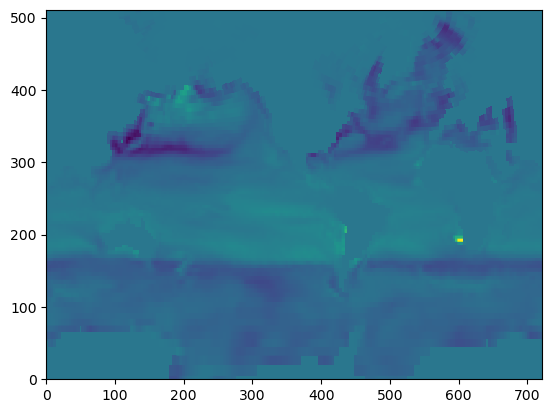

In [17]:
plt.figure()
plt.pcolor(co2flux[0,:,:])

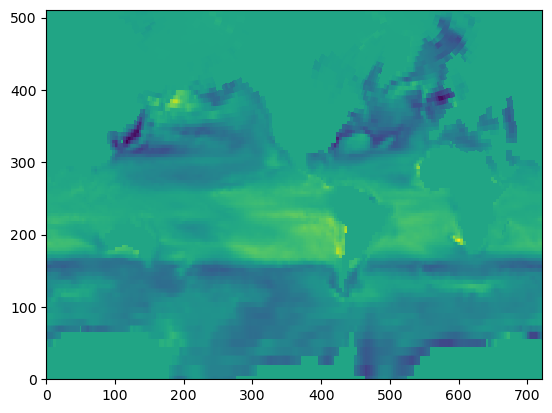

In [18]:
plt.pcolor(co2flux[2,:,:])

In [19]:
ds['nav_lon'].min()

<xarray.DataArray 'nav_lon' ()>
array(-179.99701, dtype=float32)

In [20]:
# x = nc.Dataset(fn)
# lat = x.variables['nav_lat']
# print(lat)
# shape = x.variables['nav_lat'].shape

In [21]:
# ds['nav_lon'] = ds['nav_lon'].values.flatten()
# ds['nav_lat'] = ds['nav_lat'].values.flatten()

In [30]:
ds['nav_lon'] = ds['nav_lon'].round(decimals = 0)
ds['nav_lat'] = ds['nav_lat'].round(decimals = 0)

In [31]:
ds.nav_lon

<xarray.DataArray 'nav_lon' (nav_lon: 368942)>
array([73., 73., 74., ..., 73., 73., 73.], dtype=float32)
Coordinates:
  * nav_lon  (nav_lon) float32 73.0 73.0 74.0 74.0 75.0 ... 73.0 73.0 73.0 73.0

In [32]:
min_lon = -28
min_lat = 36
max_lon = 22
max_lat = 68

mask_lon = (ds.nav_lon >= min_lon) & (ds.nav_lon <= max_lon)
mask_lat = (ds.nav_lat >= min_lat) & (ds.nav_lat <= max_lat)

In [33]:
max_lon = 22
min_lat = 36
min_lon = -28
max_lat = 68

sliced_data = ds.sel(y=slice(max_lat,min_lat),
                     x=slice(max_lon,min_lon))

In [21]:
# slice an area
lat_bnd = [36, 68]
lon_bnd = [78, 140]
area = ds.sel(x=slice(*lon_bnd), y=slice(*lat_bnd),)
area

<xarray.Dataset>
Dimensions:               (y: 32, x: 62, time_counter: 1020, axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 -72.28 -72.28 -72.28 ... -66.91 -66.91
    nav_lon               (y, x) float32 111.8 112.2 112.8 ... 141.2 141.8 142.2
    time_centered         (time_counter) datetime64[ns] 2015-01-16T12:00:00 ....
  * time_counter          (time_counter) datetime64[ns] 2015-01-16T12:00:00 ....
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] 2015-01...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] 2015-01...
    co2flux_cpl           (time_counter, y, x) float64 ...
Attributes:
    name:         FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20150101_20151231
    description:  diagnostics 2d bio
    title:        diagnostics 2d bio
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2022-Apr-04 13:54:06 CEST
    history:      Wed Jul 13 13:57:37 2022: ncrcat -F -O -L 1 -7 -v co2flux_c...
    NCO:          netCDF Operators version 4.9.1 (Homepage = http://nco.sf.ne...

In [22]:
area.nav_lat.values

array([[-72.28194 , -72.28194 , -72.28194 , ..., -72.28194 , -72.28194 ,
        -72.28194 ],
       [-72.129135, -72.129135, -72.129135, ..., -72.129135, -72.129135,
        -72.129135],
       [-71.97506 , -71.97506 , -71.97506 , ..., -71.97506 , -71.97506 ,
        -71.97506 ],
       ...,
       [-67.29768 , -67.29768 , -67.29768 , ..., -67.29768 , -67.29768 ,
        -67.29768 ],
       [-67.103935, -67.103935, -67.103935, ..., -67.103935, -67.103935,
        -67.103935],
       [-66.90862 , -66.90862 , -66.90862 , ..., -66.90862 , -66.90862 ,
        -66.90862 ]], dtype=float32)

In [23]:
area.nav_lon.values

array([[111.75, 112.25, 112.75, ..., 141.25, 141.75, 142.25],
       [111.75, 112.25, 112.75, ..., 141.25, 141.75, 142.25],
       [111.75, 112.25, 112.75, ..., 141.25, 141.75, 142.25],
       ...,
       [111.75, 112.25, 112.75, ..., 141.25, 141.75, 142.25],
       [111.75, 112.25, 112.75, ..., 141.25, 141.75, 142.25],
       [111.75, 112.25, 112.75, ..., 141.25, 141.75, 142.25]],
      dtype=float32)

In [11]:
sliced_data = ds.where((-28 < ds.nav_lon) & (ds.nav_lon < 22) & (36 < ds.nav_lat) & (ds.nav_lat < 68), drop=True)

# https://stackoverflow.com/questions/41818927/how-to-subset-data-using-multidimensional-coordinates-using-python-xarray

In [12]:
sliced_data

<xarray.Dataset>
Dimensions:               (time_counter: 1020, axis_nbounds: 2, y: 112, x: 100)
Coordinates:
    nav_lat               (y, x) float32 36.36 36.36 36.36 ... 63.86 63.69 63.53
    nav_lon               (y, x) float32 -27.75 -27.25 -26.75 ... 35.44 35.87
    time_centered         (time_counter) datetime64[ns] 2015-01-16T12:00:00 ....
  * time_counter          (time_counter) datetime64[ns] 2015-01-16T12:00:00 ....
Dimensions without coordinates: axis_nbounds, y, x
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds, y, x) datetime64[ns] 2...
    time_counter_bounds   (time_counter, axis_nbounds, y, x) datetime64[ns] 2...
    co2flux_cpl           (time_counter, y, x) float64 -3.667e-09 ... nan
Attributes:
    name:         FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20150101_20151231
    description:  diagnostics 2d bio
    title:        diagnostics 2d bio
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2022-Apr-04 13:54:06 CEST
    history:      Wed Jul 13 13:57:37 2022: ncrcat -F -O -L 1 -7 -v co2flux_c...
    NCO:          netCDF Operators version 4.9.1 (Homepage = http://nco.sf.ne...

In [14]:
sliced_data.nav_lon

<xarray.DataArray 'nav_lon' (y: 112, x: 100)>
array([[-27.748184, -27.246628, -26.745064, ...,  20.859863,  21.359913,
         21.859932],
       [-27.748024, -27.246298, -26.744564, ...,  20.871433,  21.37148 ,
         21.871496],
       [-27.747858, -27.24595 , -26.744032, ...,  20.883837,  21.38388 ,
         21.88389 ],
       ...,
       [-29.120808, -28.338602, -27.554451, ...,  34.337868,  34.776295,
         35.21116 ],
       [-29.188316, -28.397364, -27.60437 , ...,  34.669933,  35.10624 ,
         35.53892 ],
       [-29.258904, -28.458921, -27.656797, ...,  35.008133,  35.442245,
         35.872677]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 36.36 36.36 36.36 36.36 ... 64.02 63.86 63.69 63.53
    nav_lon  (y, x) float32 -27.75 -27.25 -26.75 -26.24 ... 35.01 35.44 35.87
Dimensions without coordinates: y, x
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east

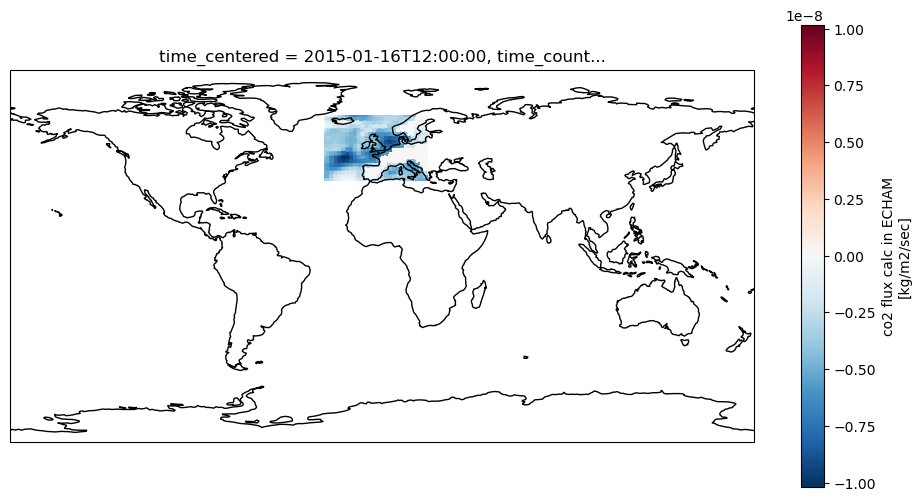

In [16]:
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
sliced_data.co2flux_cpl[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", add_colorbar=True
)
ax.coastlines()

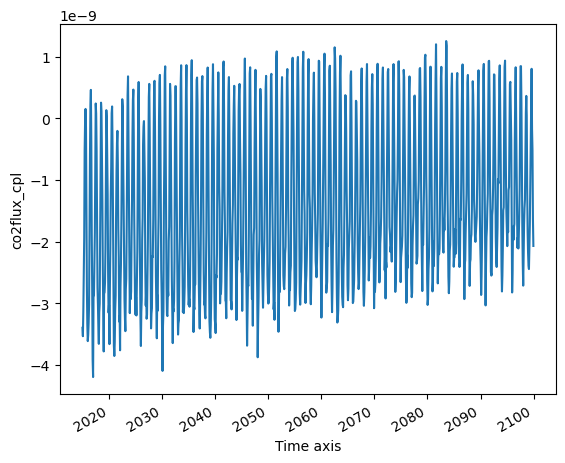

In [17]:
sliced_data.co2flux_cpl.mean(dim=('y', 'x')).plot() # regional mean

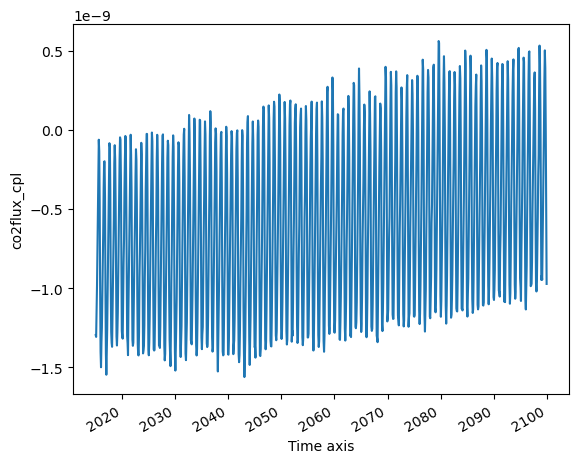

In [18]:
ds.co2flux_cpl.mean(dim=('y', 'x')).plot() # global mean